In [ ]:
import re
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import regex
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Extract the Date time
def date_time(s):
    pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result=re.match(pattern, s)
    if result:
        return True
    return False

# Extract contacts
def find_contact(s):
    s=s.split(":")
    if len(s)==2:
        return True
    else:
        return False

# Extract Message
def getMassage(line):
    splitline=line.split(' - ')
    datetime= splitline[0];
    date, time= datetime.split(', ')
    message=" ".join(splitline[1:])

    if find_contact(message):
        splitmessage=message.split(": ")
        author=splitmessage[0]
        message=splitmessage[1]
    else:
        author=None
    return date, time, author, message

In [1]:
data=[]
conversation='#Load Your Data Here'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer=[]
    date, time, author= None, None, None
    while True:
        line=fp.readline()
        if not line:
            break
        line=line.strip()
        if date_time(line):
            if len(messageBuffer) >0:
                data.append([date, time, author, ''.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message=getMassage(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

FileNotFoundError: [Errno 2] No such file or directory: '#Load Your Data Here'

In [2]:
df=pd.DataFrame(data, columns=["Date", "Time", "contact", "Message"])
df['Date']=pd.to_datetime(df['Date'])

data=df.dropna()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
data["positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

data.head(50)

NameError: name 'pd' is not defined

In [ ]:
x=sum(data["positive"])
y=sum(data["negative"])
z=sum(data["neutral"])

def score(a,b,c):
    if (a>b) and (a>c):
        print("Positive ")
    if (b>a) and (b>c):
        print("Negative")
    if (c>a) and (c>b):
        print("Neutal")

score(x,y,z)

Neutal


In [ ]:
df.contact.unique()

array([None, 'Gu Karuna Aiml', '+91 73982 91683', 'Gu Harsh Prajapati',
       '+91 88824 45490', 'Gu Atharv', '+91 63065 06783', 'Gu Amol',
       '+91 63068 33980', '+91 82997 66708', 'Gu Pratyaksh Dixit D',
       '+91 82187 09030', '+91 96707 67207', '+91 85957 05218',
       'वन्दे मातरम्🇮🇳🇮🇳🇮🇳', '+91 98554 46635', '+91 80777 78339',
       '+91 83407 04997', '+91 74570 00341', 'Gu Pranav 441',
       'Gu Aayushman', '+91 63951 99850', '+91 74083 39364',
       '+91 62061 60132', 'Gu Tanu', '+91 95063 60879', 'Gu Sudhanshu',
       'Gu Rohan', 'Gu Satyam 723', '+91 78589 67656', '+91 91190 81882',
       'Gu Harendra 919', 'Gu Alok Ranjan', 'Gu Aditya Sec3',
       '+91 94737 36424', '+91 73797 98020', '+91 62017 12199',
       '+91 96482 67700', '+91 96255 45571', 'Gu Rishita', 'Gu Rishab',
       '+91 76696 91287', '+91 85698 65505', 'Gu Priyanshi',
       '+91 62032 76500', 'Gu Tarun 441', 'Gu Parth', '+91 63941 59966',
       '+91 95996 63172', '+91 62004 38158', 'Gu Raghav 16

In [ ]:
def split_count(text):
    emoji_list = []
    data = re.findall(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF]', text)
    for word in data:
        emoji_list.append(word)
    return emoji_list


import regex
df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
df.head(19)

,Date,Time,contact,Message,emoji
0,2022-02-09,22:07,None,You were added,[]
1,2022-03-09,14:31,None,+91 96255 45571 joined using this group's invi...,[]
2,2022-03-09,17:50,Gu Karuna Aiml,Yrr ek baat batao aaj koi java training ki cla...,[]
3,2022-03-09,17:51,Gu Karuna Aiml,<Media omitted>,[]
4,2022-03-09,17:51,Gu Karuna Aiml,Ye toh core ka he lekin kya koi hamare section...,[]
5,2022-03-09,18:41,+91 73982 91683,Nhii,[]
6,2022-03-09,19:06,Gu Harsh Prajapati,Nhi thi,[]
7,2022-04-09,22:27,+91 88824 45490,kisi k paas kal ka timetable ho toh bhej do,[]
8,2022-04-09,22:28,+91 88824 45490,icloud pr show nahi ho raha hai,[]
9,2022-04-09,22:28,Gu Atharv,<Media omitted>,[]


There are 626248 words in all the messages.


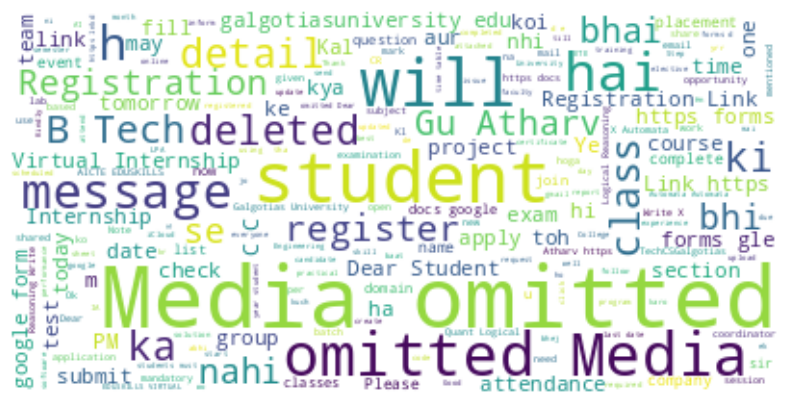

In [ ]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **New Features Added (26.08.24) -->**

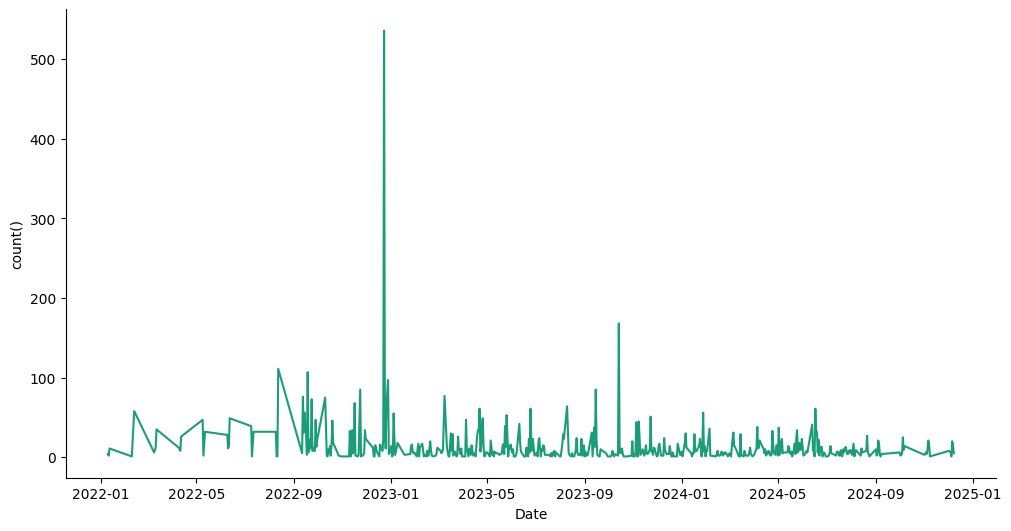

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

In [ ]:
total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

('😂', 207)
('🤣', 166)
('🔗', 39)
('🙂', 34)
('😭', 22)
('🏻', 21)
('👍', 20)
('🎉', 20)
('👉', 20)
('😶', 17)
('😅', 17)
('\U0001f979', 15)
('🙄', 14)
('🥲', 13)
('👀', 13)
('🙏', 12)
('😁', 11)
('💻', 11)
('\U0001fae0', 10)
('📍', 10)
('🌟', 10)
('🥱', 9)
('🤌', 9)
('😑', 8)
('🥳', 8)
('🏆', 8)
('🚀', 8)
('💀', 8)
('\U0001fae5', 7)
('🤔', 7)
('😌', 7)
('🗓', 7)
('🥺', 6)
('🙌', 6)
('🔥', 6)
('💫', 6)
('😊', 6)
('😏', 6)
('🌝', 5)
('🎪', 5)
('💡', 5)
('🔺', 5)
('🤐', 4)
('🤭', 4)
('🤧', 4)
('🚩', 4)
('\U0001faf6', 4)
('🎊', 4)
('😔', 4)
('🥰', 4)
('🤬', 4)
('👨', 4)
('💐', 4)
('😐', 3)
('😇', 3)
('😀', 3)
('😛', 3)
('😃', 3)
('🌚', 3)
('🤡', 3)
('😄', 3)
('📣', 3)
('📝', 3)
('😞', 3)
('🎶', 3)
('📅', 3)
('🌍', 3)
('💰', 3)
('🏀', 3)
('😈', 3)
('😆', 2)
('😢', 2)
('🧐', 2)
('\U0001fae1', 2)
('😓', 2)
('👾', 2)
('🙇', 2)
('\U0001fae2', 2)
('😡', 2)
('😉', 2)
('🤩', 2)
('📋', 2)
('🤯', 2)
('😗', 2)
('🐰', 2)
('🎯', 2)
('👺', 2)
('🎓', 2)
('🎮', 2)
('🤝', 2)
('🧠', 2)
('🎇', 2)
('🪔', 2)
('💭', 2)
('💸', 2)
('🏼', 2)
('📞', 2)
('🍔', 2)
('🚨', 2)
('👇', 2)
('🤖', 2)
('😕', 1)
('\U0

Average message length: 83.8460913155399
Top 10 most active users:
 contact
Gu Atharv             2563
Gu Karuna Aiml         492
Gu Aayushman           351
+91 91190 81882        317
Gu Amol                270
+91 74570 00341        267
Gu Harsh Prajapati     229
वन्दे मातरम्🇮🇳🇮🇳🇮🇳     171
Gu Tanu                127
Gu Sudhanshu           124
Name: count, dtype: int64
Message frequency by day of the week:
 Day_of_Week
4    1509
2    1338
6     979
3     972
5     933
0     929
1     721
Name: count, dtype: int64


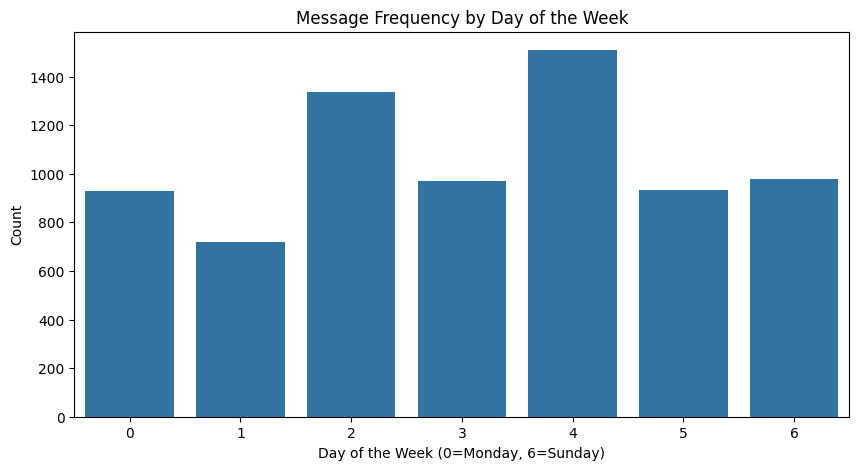

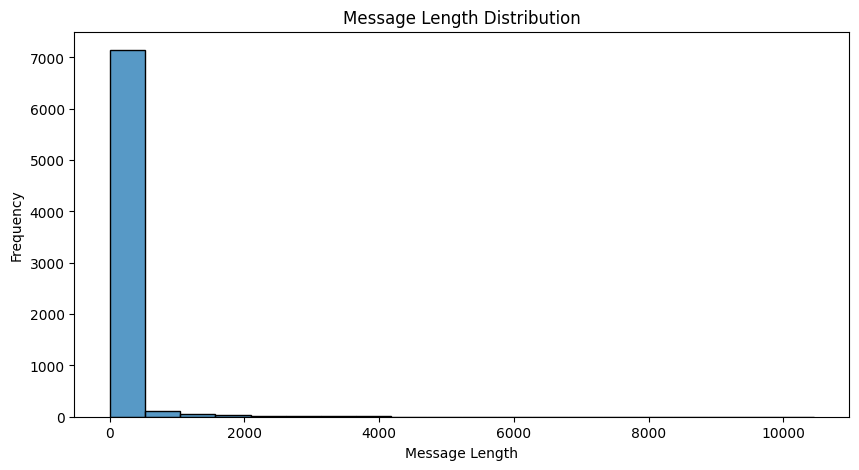

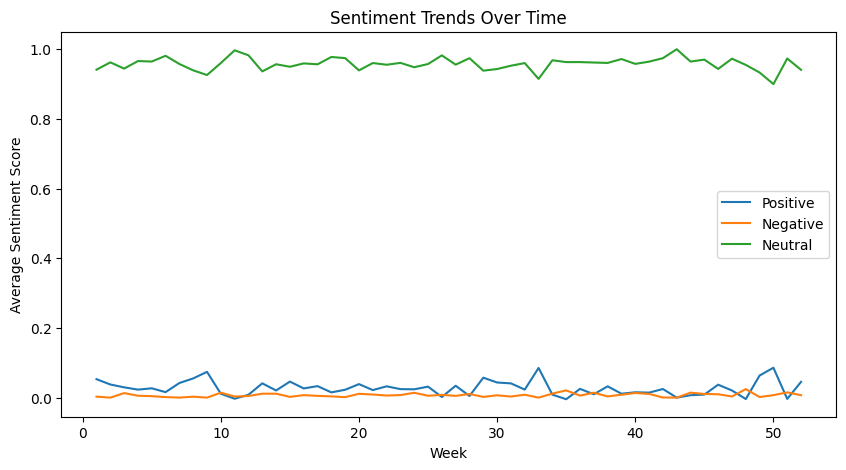

In [ ]:
import matplotlib.pyplot as plt
# Calculate the average message length
df['Message_Length'] = df['Message'].apply(lambda x: len(x))
average_message_length = df['Message_Length'].mean()
print(f"Average message length: {average_message_length}")

# Find the most active users
top_users = df['contact'].value_counts().head(10)
print("Top 10 most active users:\n", top_users)

# Analyze message frequency over time
df['Day_of_Week'] = df['Date'].dt.dayofweek
day_of_week_counts = df['Day_of_Week'].value_counts()
print("Message frequency by day of the week:\n", day_of_week_counts)

# Visualize message frequency by day of the week
plt.figure(figsize=(10, 5))
sns.countplot(x='Day_of_Week', data=df)
plt.title('Message Frequency by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Count')
plt.show()

# Analyze message length distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Message_Length'], bins=20)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# Analyze sentiment trends over time
df['Week'] = df['Date'].dt.isocalendar().week
weekly_sentiment = df.groupby('Week').agg({'positive': 'mean', 'negative': 'mean', 'neutral': 'mean'})
plt.figure(figsize=(10, 5))
plt.plot(weekly_sentiment.index, weekly_sentiment['positive'], label='Positive')
plt.plot(weekly_sentiment.index, weekly_sentiment['negative'], label='Negative')
plt.plot(weekly_sentiment.index, weekly_sentiment['neutral'], label='Neutral')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Week')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common words: [('Media', 1154), ('omitted', 1150), ('hai', 693), ('students', 672), ('https', 449), ('h', 432), ('Students', 346), ('message', 333), ('ka', 297), ('Dear', 295)]


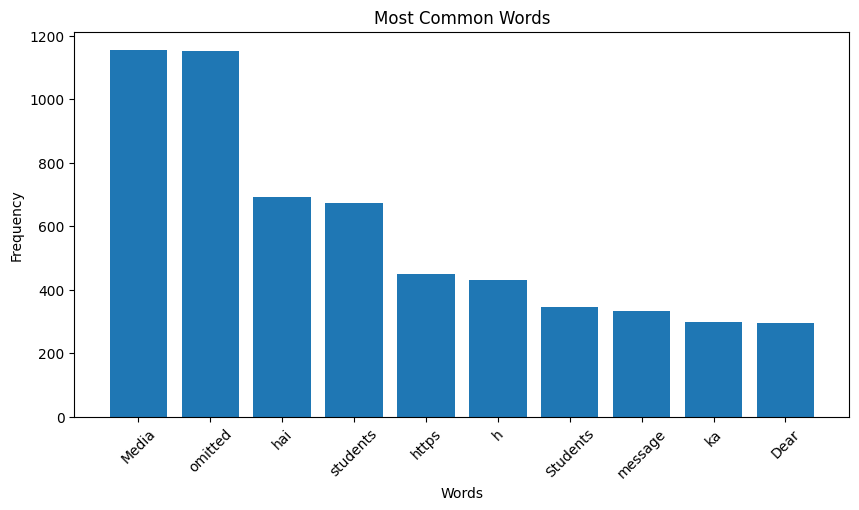

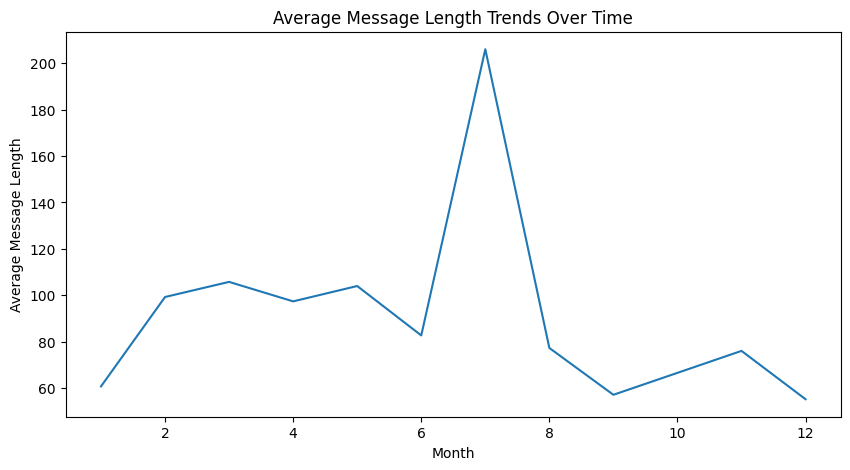

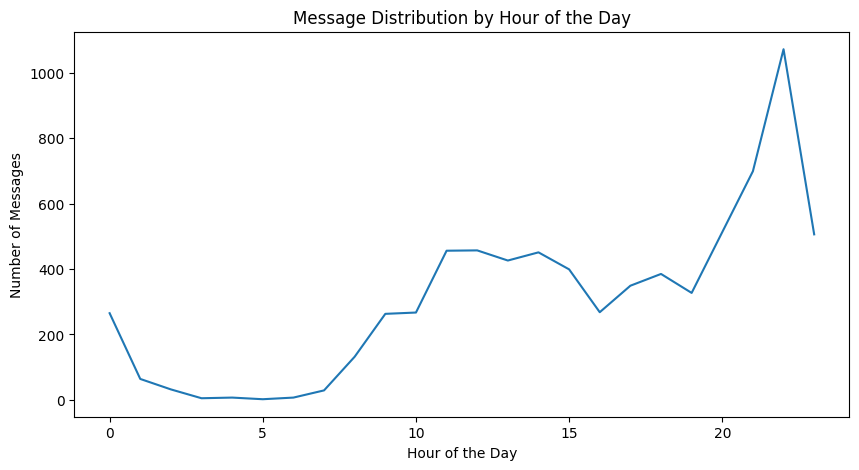

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
  """
  Preprocesses the text by removing stop words and punctuation.
  """
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word.lower() not in stop_words and word.isalnum()]
  return tokens

# Apply preprocessing to the 'Message' column
df['Processed_Message'] = df['Message'].apply(preprocess_text)

# Flatten the list of words
all_words = [word for message in df['Processed_Message'] for word in message]

# Count the frequency of each word
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common(10)
print("Most common words:", most_common_words)

# Visualize the most common words
plt.figure(figsize=(10, 5))
plt.bar([word for word, count in most_common_words], [count for word, count in most_common_words])
plt.title('Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Analyze message length trends over time
df['Month'] = df['Date'].dt.month
monthly_message_length = df.groupby('Month').agg({'Message_Length': 'mean'})
plt.figure(figsize=(10, 5))
plt.plot(monthly_message_length.index, monthly_message_length['Message_Length'])
plt.title('Average Message Length Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Average Message Length')
plt.show()

# Analyze the distribution of messages by hour of the day
df['Hour'] = df['Time'].str.split(':').str[0].astype(int)
hourly_message_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(hourly_message_counts.index, hourly_message_counts.values)
plt.title('Message Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.show()

In [ ]:
# Aggregate the sentiment scores by date
sentiment_by_date = data.groupby('Date').agg({
    'positive': 'mean',
    'negative': 'mean',
    'neutral': 'mean'
}).reset_index()

# Normalize the date for consistent plotting
sentiment_by_date['Date'] = pd.to_datetime(sentiment_by_date['Date']).dt.date


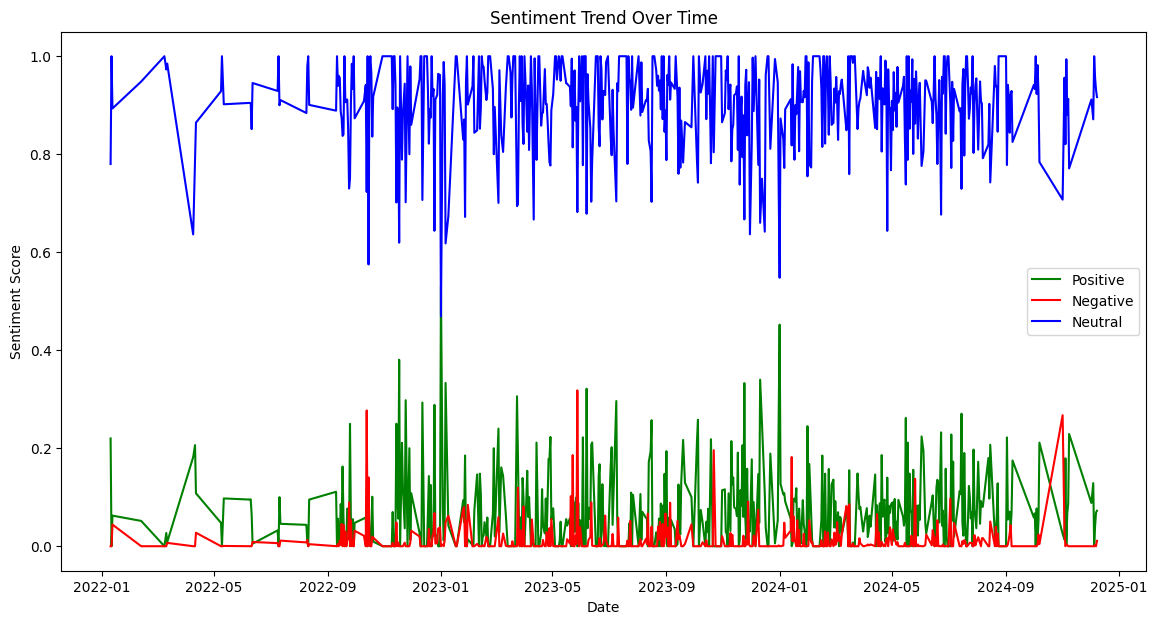

In [ ]:
import matplotlib.pyplot as plt

# Plotting the sentiment trends over time
plt.figure(figsize=(14, 7))
plt.plot(sentiment_by_date['Date'], sentiment_by_date['positive'], color='g', label='Positive')
plt.plot(sentiment_by_date['Date'], sentiment_by_date['negative'], color='r', label='Negative')
plt.plot(sentiment_by_date['Date'], sentiment_by_date['neutral'], color='b', label='Neutral')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Trend Over Time')
plt.legend(loc='best')
plt.show()


In [ ]:
# Count the number of messages per contact
top_contributors = data['contact'].value_counts().reset_index()
top_contributors.columns = ['contact', 'message_count']

# Display the top 10 contributors
top_10_contributors = top_contributors.head(10)
print(top_10_contributors)


              contact  message_count
0           Gu Atharv           2563
1      Gu Karuna Aiml            492
2        Gu Aayushman            351
3     +91 91190 81882            317
4             Gu Amol            270
5     +91 74570 00341            267
6  Gu Harsh Prajapati            229
7  वन्दे मातरम्🇮🇳🇮🇳🇮🇳            171
8             Gu Tanu            127
9        Gu Sudhanshu            124


In [ ]:
# Calculate average sentiment scores for top contributors
top_contributor_sentiments = data[data['contact'].isin(top_10_contributors['contact'])].groupby('contact').agg({
    'positive': 'mean',
    'negative': 'mean',
    'neutral': 'mean',
    'Message': 'count'
}).reset_index()

# Sort by message count
top_contributor_sentiments = top_contributor_sentiments.sort_values(by='Message', ascending=False)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

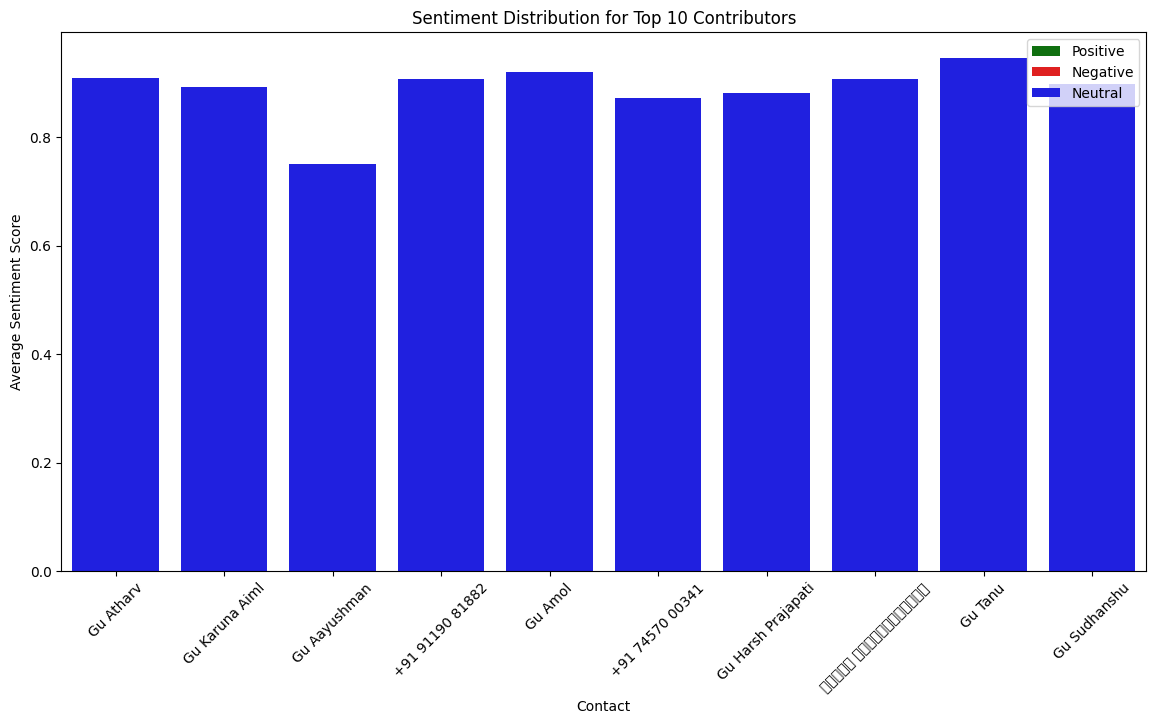

In [ ]:
import seaborn as sns

# Plot sentiment distribution for top contributors
plt.figure(figsize=(14, 7))
sns.barplot(x='contact', y='positive', data=top_contributor_sentiments, color='green', label='Positive')
sns.barplot(x='contact', y='negative', data=top_contributor_sentiments, color='red', label='Negative')
sns.barplot(x='contact', y='neutral', data=top_contributor_sentiments, color='blue', label='Neutral')

plt.xlabel('Contact')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Distribution for Top 10 Contributors')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')

# Fit and transform the messages
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Message'])

# Get the feature names (keywords)
keywords = tfidf_vectorizer.get_feature_names_out()

# Sum up the TF-IDF scores for each keyword across all messages
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create a DataFrame with keywords and their corresponding TF-IDF scores
keyword_scores = pd.DataFrame({'keyword': keywords, 'score': tfidf_scores})

# Sort keywords by TF-IDF score in descending order
top_keywords = keyword_scores.sort_values(by='score', ascending=False).head(20)

print(top_keywords)


       keyword       score
2729   omitted  813.922847
2496     media  812.627954
2527   message  202.688284
1140   deleted  201.912011
1738       hai  177.531444
2274       kya  110.548427
2147        ka   90.319592
1724        ha   88.513896
2625      nahi   86.420807
3613  students   82.524807
1809        ho   78.720093
873      class   74.897971
4084        ye   73.950681
2657       nhi   73.538635
2207        ki   71.369586
625       bhai   70.593405
643        bhi   66.171832
2691      null   64.028883
3393        se   60.345397
2722        ok   60.200096


In [ ]:
# Create a function to extract keywords from each message
def extract_keywords(message, keywords):
    return [keyword for keyword in keywords if keyword in message]

# Apply the function to the messages
data['keywords'] = data['Message'].apply(lambda x: extract_keywords(x, top_keywords['keyword']))

# Explode the keywords list into separate rows for analysis
data_exploded = data.explode('keywords')

# Group by keyword and calculate average sentiment scores
keyword_sentiments = data_exploded.groupby('keywords').agg({
    'positive': 'mean',
    'negative': 'mean',
    'neutral': 'mean',
    'Message': 'count'
}).reset_index()

# Sort by the number of mentions (Message count)
keyword_sentiments = keyword_sentiments.sort_values(by='Message', ascending=False)


<ipython-input-67-c5f2487958f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['keywords'] = data['Message'].apply(lambda x: extract_keywords(x, top_keywords['keyword']))


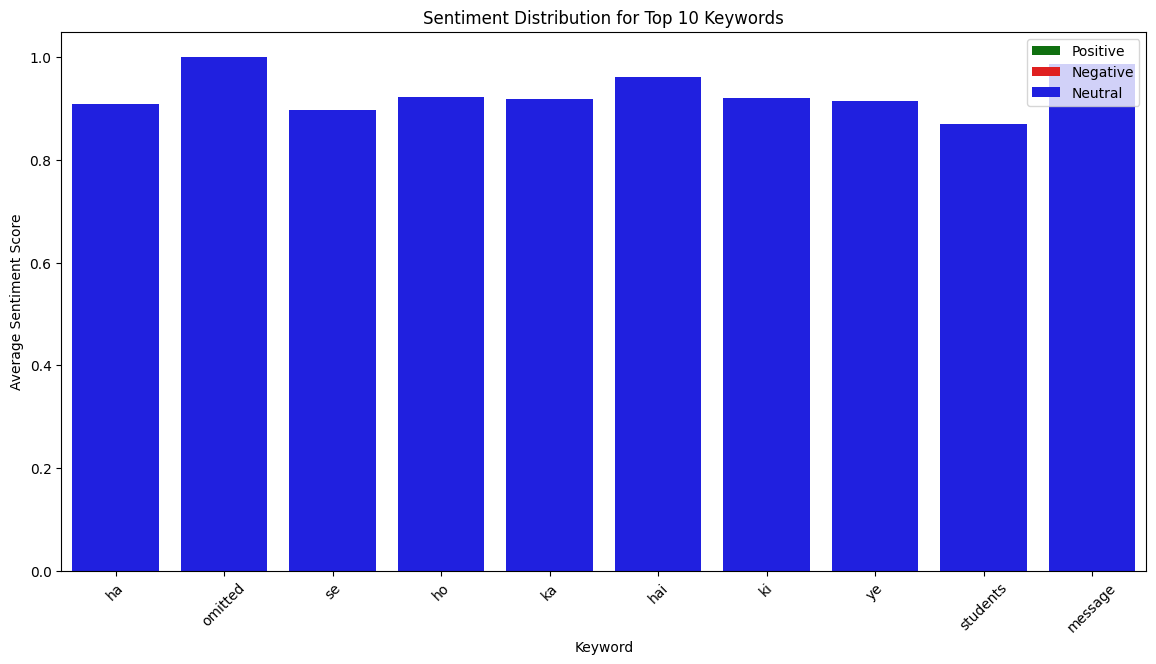

In [ ]:
# Plot sentiment distribution for top keywords
plt.figure(figsize=(14, 7))
sns.barplot(x='keywords', y='positive', data=keyword_sentiments.head(10), color='green', label='Positive')
sns.barplot(x='keywords', y='negative', data=keyword_sentiments.head(10), color='red', label='Negative')
sns.barplot(x='keywords', y='neutral', data=keyword_sentiments.head(10), color='blue', label='Neutral')

plt.xlabel('Keyword')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment Distribution for Top 10 Keywords')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()


In [ ]:
# Calculate average sentiment scores by contact
contact_sentiment = data.groupby('contact').agg({
    'positive': 'mean',
    'negative': 'mean',
    'neutral': 'mean',
    'Message': 'count'
}).reset_index()

# Sort by the number of messages to focus on the most active contacts
contact_sentiment = contact_sentiment.sort_values(by='Message', ascending=False)

print(contact_sentiment.head(50))


                      contact  positive  negative   neutral  Message
44                  Gu Atharv  0.062297  0.012540  0.908382     2563
48             Gu Karuna Aiml  0.043348  0.020181  0.891754      492
40               Gu Aayushman  0.192627  0.022832  0.750356      351
30            +91 91190 81882  0.051767  0.012596  0.907246      317
43                    Gu Amol  0.036244  0.017467  0.920363      270
15            +91 74570 00341  0.056476  0.017955  0.873131      267
47         Gu Harsh Prajapati  0.064402  0.010493  0.881437      229
68         वन्दे मातरम्🇮🇳🇮🇳🇮🇳  0.072912  0.013637  0.907602      171
65                    Gu Tanu  0.014024  0.015795  0.946551      127
62               Gu Sudhanshu  0.068484  0.009419  0.897903      124
38            +91 98554 46635  0.051837  0.022764  0.876618      123
50              Gu Nirnay 450  0.064636  0.000000  0.879290      107
9             +91 63951 99850  0.025160  0.016790  0.958050      100
60              Gu Satyam 723  0.0

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

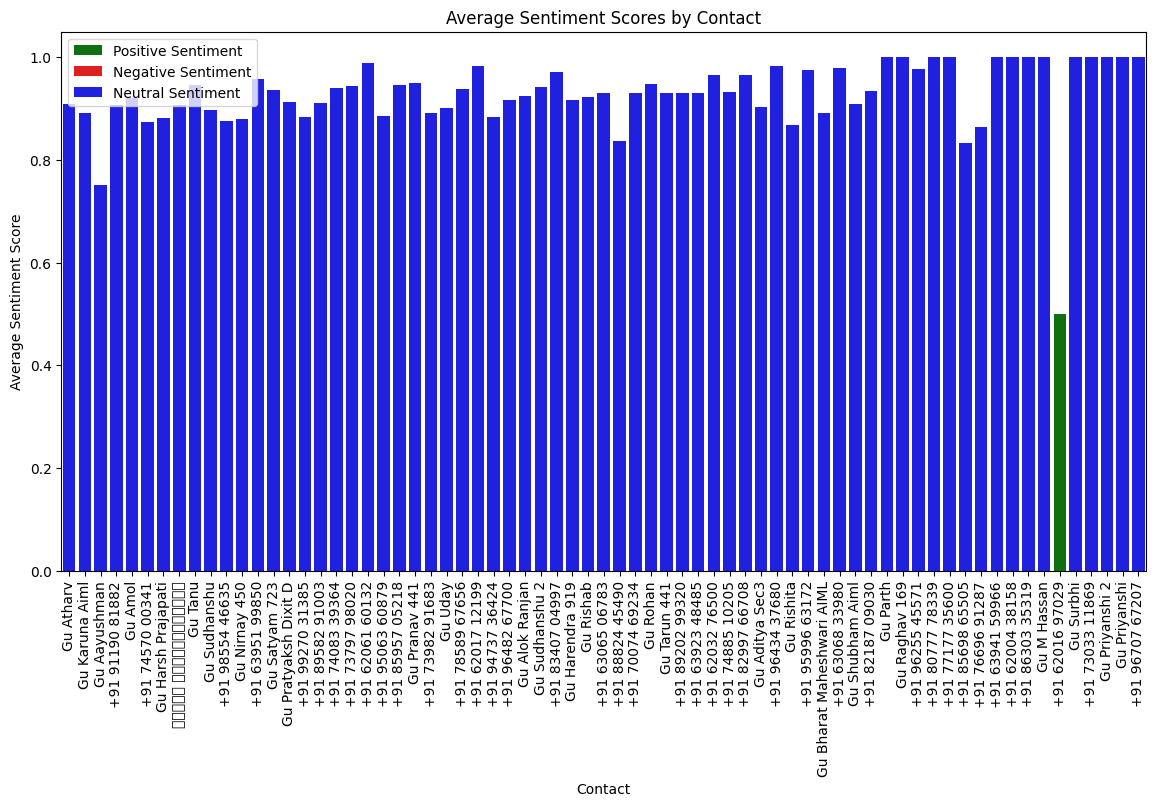

In [ ]:
# Plot average sentiment scores by contact
fig, ax = plt.subplots(figsize=(14, 7))

# Plot positive sentiment
sns.barplot(x='contact', y='positive', data=contact_sentiment, color='green', label='Positive Sentiment', ax=ax)

# Plot negative sentiment
sns.barplot(x='contact', y='negative', data=contact_sentiment, color='red', label='Negative Sentiment', ax=ax)

# Plot neutral sentiment
sns.barplot(x='contact', y='neutral', data=contact_sentiment, color='blue', label='Neutral Sentiment', ax=ax)

plt.xlabel('Contact')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Scores by Contact')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [ ]:
# Create a matrix to store sentiment overlap
contact_names = contact_sentiment['contact'].tolist()
num_contacts = len(contact_names)
overlap_matrix = np.zeros((num_contacts, num_contacts))

# Fill the overlap matrix
for i, contact_i in enumerate(contact_names):
    for j, contact_j in enumerate(contact_names):
        if i != j:
            overlap_i = data[data['contact'] == contact_i][['positive', 'negative', 'neutral']].mean()
            overlap_j = data[data['contact'] == contact_j][['positive', 'negative', 'neutral']].mean()
            overlap_matrix[i, j] = np.corrcoef(overlap_i, overlap_j)[0, 1]

# Convert the matrix to a DataFrame for better readability
overlap_df = pd.DataFrame(overlap_matrix, index=contact_names, columns=contact_names)

print(overlap_df)


                 Gu Atharv  Gu Karuna Aiml  Gu Aayushman  +91 91190 81882  \
Gu Atharv         0.000000        0.999659      0.984637         0.999943   
Gu Karuna Aiml    0.999659        0.000000      0.979743         0.999881   
Gu Aayushman      0.984637        0.979743      0.000000         0.982714   
+91 91190 81882   0.999943        0.999881      0.982714         0.000000   
Gu Amol           0.999512        0.999987      0.978703         0.999789   
...                    ...             ...           ...              ...   
Gu Surbhi         0.998778        0.999728      0.974806         0.999249   
+91 73033 11869   0.998778        0.999728      0.974806         0.999249   
Gu Priyanshi 2    0.998778        0.999728      0.974806         0.999249   
Gu Priyanshi      0.998778        0.999728      0.974806         0.999249   
+91 96707 67207   0.998778        0.999728      0.974806         0.999249   

                  Gu Amol  +91 74570 00341  Gu Harsh Prajapati  \
Gu Atharv

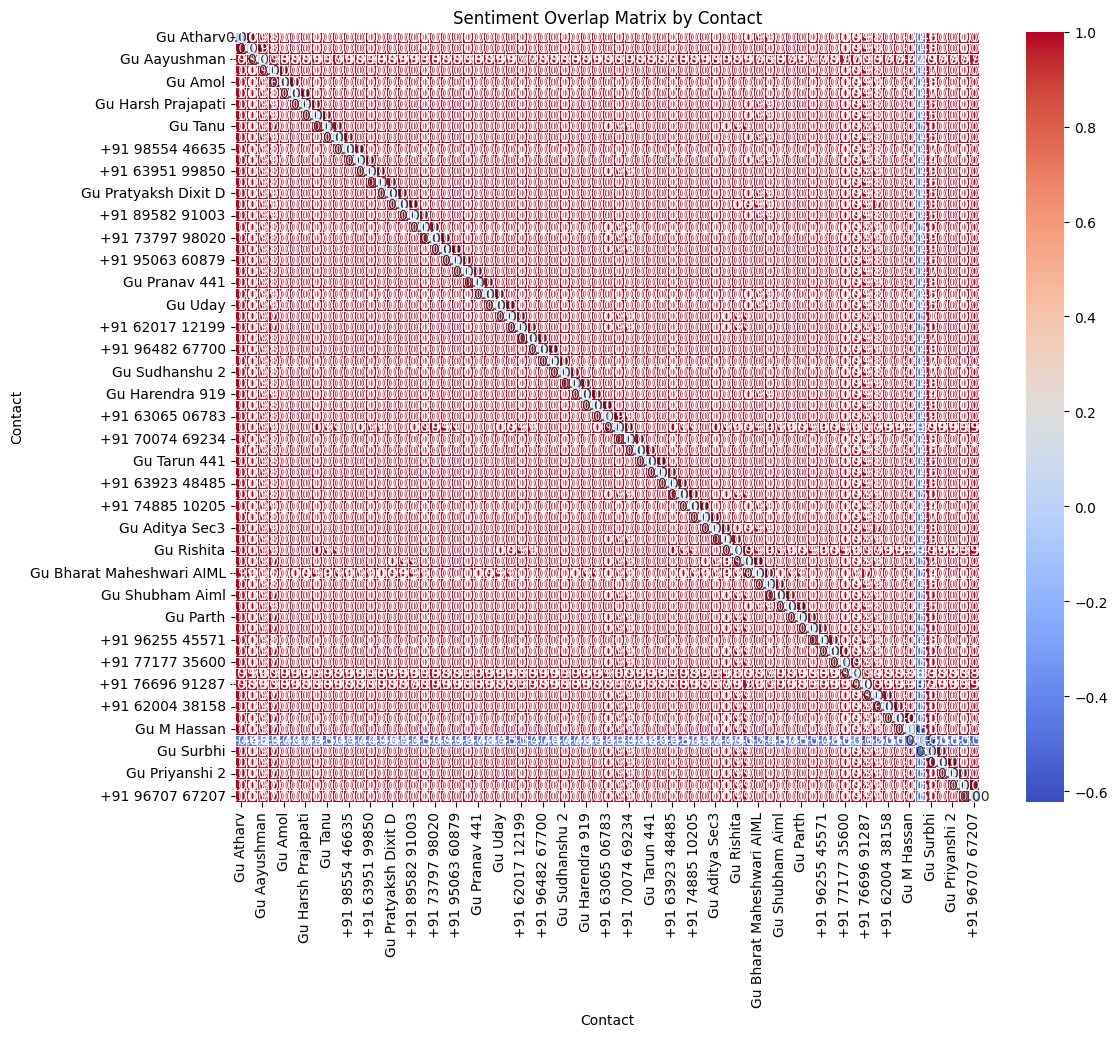

In [ ]:
import seaborn as sns

# Plot heatmap of the sentiment overlap matrix
plt.figure(figsize=(12, 10))
sns.heatmap(overlap_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Sentiment Overlap Matrix by Contact')
plt.xlabel('Contact')
plt.ylabel('Contact')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [ ]:
# Ensure 'Date' column is converted to datetime format using .loc[]
data.loc[:, 'Date'] = pd.to_datetime(data['Date'])


In [ ]:
# Check if 'Hour' column exists and display first few rows
print(data.head())
print(data.columns)


        Date   Time             contact  \
2 2022-03-09  17:50      Gu Karuna Aiml   
3 2022-03-09  17:51      Gu Karuna Aiml   
4 2022-03-09  17:51      Gu Karuna Aiml   
5 2022-03-09  18:41     +91 73982 91683   
6 2022-03-09  19:06  Gu Harsh Prajapati   

                                             Message  positive  negative  \
2  Yrr ek baat batao aaj koi java training ki cla...       0.0       0.0   
3                                    <Media omitted>       0.0       0.0   
4  Ye toh core ka he lekin kya koi hamare section...       0.0       0.0   
5                                               Nhii       0.0       0.0   
6                                            Nhi thi       0.0       0.0   

   neutral                                  Truncated_Message BERT_sentiment  \
2      1.0  yrr ek baat batao aaj koi java training ki cla...       negative   
3      1.0                                  < media omitted >       negative   
4      1.0  ye toh core ka he lekin kya koi 

In [ ]:
print(data['Time'].head())


2    17:50
3    17:51
4    17:51
5    18:41
6    19:06
Name: Time, dtype: object


In [ ]:
# Example of 24-hour format
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour


<ipython-input-87-501cb0fb42a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour


In [ ]:
# Assuming time is in 24-hour format
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce').dt.hour
print(data[['Time', 'Hour']].head())


    Time  Hour
2  17:50    17
3  17:51    17
4  17:51    17
5  18:41    18
6  19:06    19


<ipython-input-88-82112b64bb5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce').dt.hour


In [ ]:
# Extract hour from the Time column if not already done
if 'Hour' not in data.columns:
    data['Hour'] = pd.to_datetime(data['Time'], format='%I:%M %p').dt.hour

# Create pivot tables for sentiment analysis
heatmap_data_positive = data.pivot_table(index='Date', columns='Hour', values='positive', aggfunc='mean')
heatmap_data_negative = data.pivot_table(index='Date', columns='Hour', values='negative', aggfunc='mean')
heatmap_data_neutral = data.pivot_table(index='Date', columns='Hour', values='neutral', aggfunc='mean')

print(heatmap_data_positive.head())


Hour         0   1   2   3   4   5   6    7   8       9   ...   14        15  \
Date                                                      ...                  
2022-01-10  0.0 NaN NaN NaN NaN NaN NaN  NaN NaN     NaN  ...  NaN       NaN   
2022-01-11  NaN NaN NaN NaN NaN NaN NaN  NaN NaN  0.0000  ...  NaN       NaN   
2022-01-12  NaN NaN NaN NaN NaN NaN NaN  0.0 NaN  0.3435  ...  NaN  0.000000   
2022-02-12  NaN NaN NaN NaN NaN NaN NaN  NaN NaN     NaN  ...  0.0  0.018625   
2022-03-09  NaN NaN NaN NaN NaN NaN NaN  NaN NaN     NaN  ...  NaN       NaN   

Hour        16     17   18   19  20        21   22        23  
Date                                                          
2022-01-10 NaN  0.440  NaN  NaN NaN       NaN  NaN       NaN  
2022-01-11 NaN    NaN  NaN  NaN NaN       NaN  NaN       NaN  
2022-01-12 NaN    NaN  NaN  0.0 NaN       NaN  NaN       NaN  
2022-02-12 NaN  0.075  0.0  NaN NaN  0.019045  0.0  0.111111  
2022-03-09 NaN  0.000  0.0  0.0 NaN       NaN  NaN       NaN 

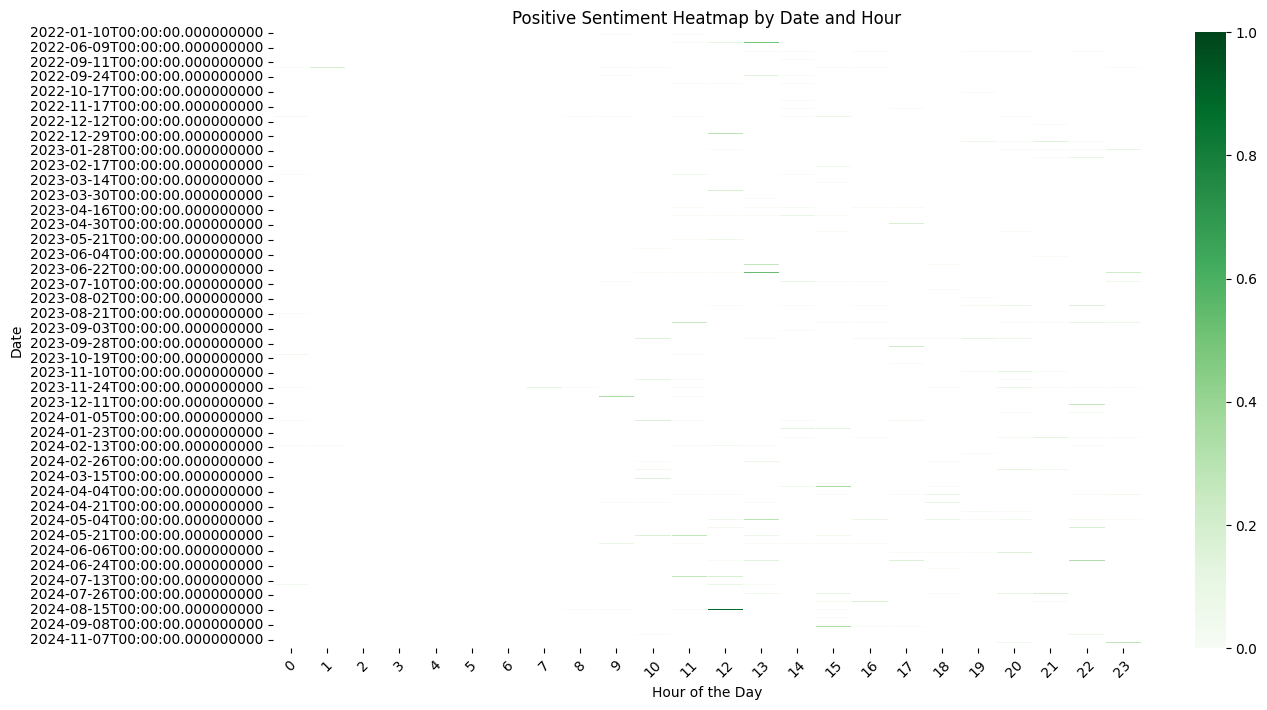

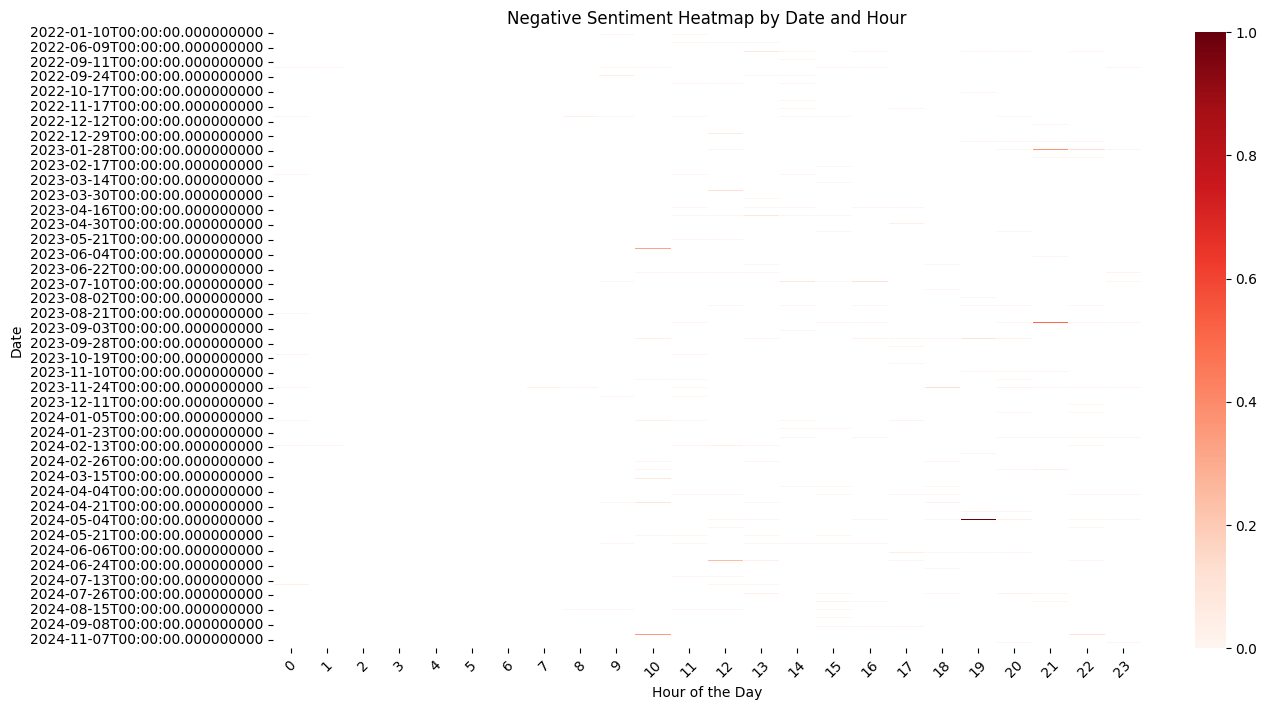

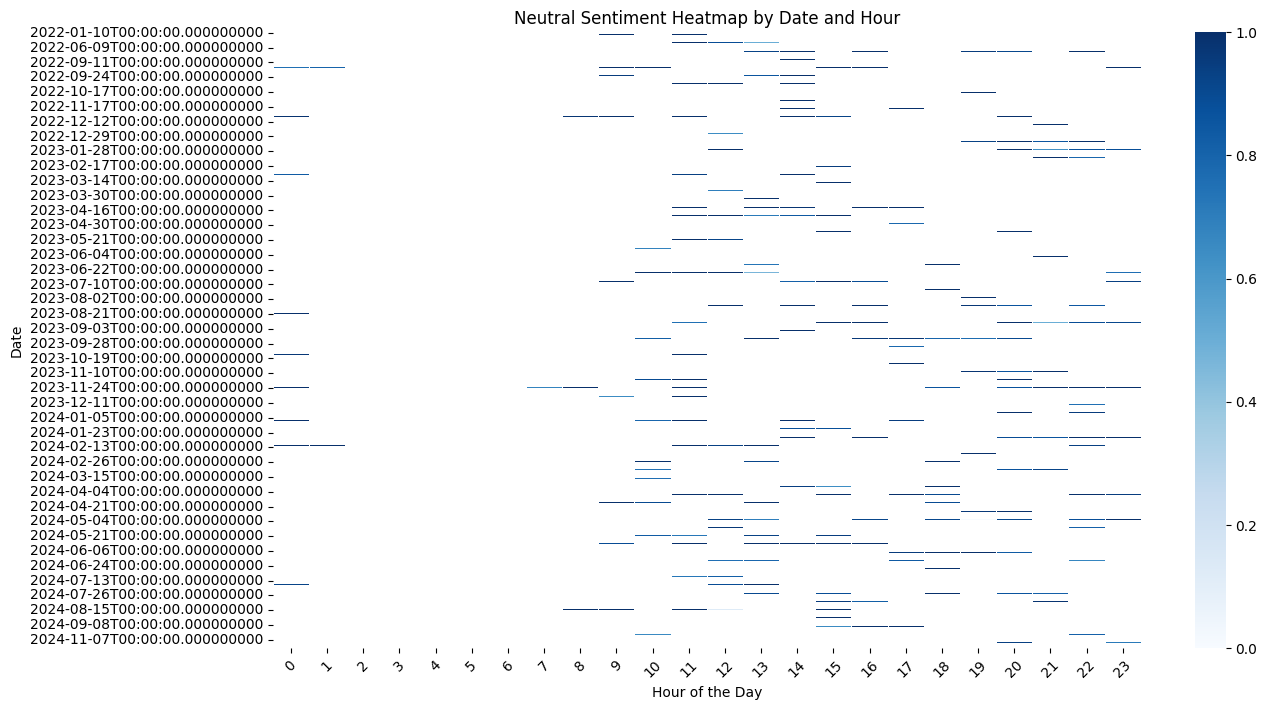

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap for positive sentiment
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_positive, cmap='Greens', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Positive Sentiment Heatmap by Date and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.show()

# Plot heatmap for negative sentiment
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_negative, cmap='Reds', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Negative Sentiment Heatmap by Date and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.show()

# Plot heatmap for neutral sentiment
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_neutral, cmap='Blues', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Neutral Sentiment Heatmap by Date and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.show()
